# 대전 코로나 확진자 EDA

#### Hwang in woo

## 목차
- 1. 사전준비
- 2. 문제정의
- 3. 데이터프레임 생성과정
- 4. EDA 분석
- 5. EDA 결과

### 1. 사전 준비 (import)
- 라이브러리 import
- 한글 폰트 깨짐 방지

In [80]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request 
import requests
import matplotlib.pyplot as plt
import folium
import json
from IPython.display import Image

In [81]:
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

### 2. 문제 정의
- 대전광역시의 코로나 확진자에 대한 정보 파악

### 3. 데이터프레임 생성 과정

#### 3-1. HTML 불러오기

In [82]:
url = 'https://www.daejeon.go.kr/corona19/index.do?menuId=0002'
html= requests.get( url ).text
soup= BeautifulSoup( html, 'lxml' )
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="대전광역시 코로나19" name="keywords"/>
<meta content="대전광역시, 코로나19" name="description"/>
<script src="/corona19/js/drh/layout/jquery-1.11.3.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/commonUtil.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/stringUtil.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/system_util.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/system_board.js" type="text/javascript"></script>
<script src="/corona19/js/drh/layout/jquery.bxslider.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/jquery.form.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/html5shiv.js" type="text/javascript"></script>
<script src="/corona19/js/drh/common.js" type="text/ja

#### 3-2. 데이터 스크래핑
- 항목별로 스크래핑

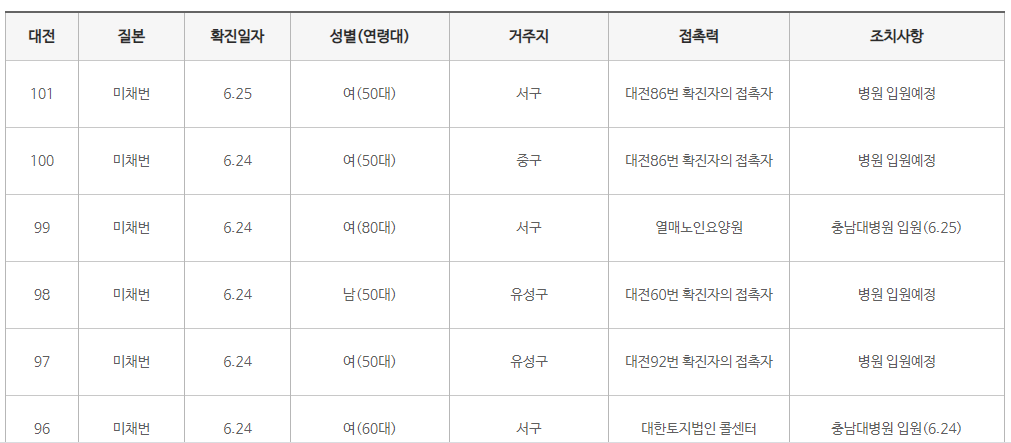

In [83]:
Image("1.png")

- 왼쪽서부터 "대전"~"조치사항", 각 항목별로 스크래핑 할 예정

In [84]:
# 대전 #
num1 = soup.select('table > tbody > tr > td:nth-child(1)')
num1
num=[num1[i].get_text() for i in range(len(num1))]
num
for i,s in enumerate(num):
    num[i] = s.strip()
num

['101',
 '100',
 '99',
 '98',
 '97',
 '96',
 '95',
 '94',
 '93',
 '92',
 '91',
 '90',
 '89',
 '88',
 '87',
 '86',
 '85',
 '84',
 '83',
 '82',
 '81',
 '80',
 '79',
 '78',
 '77',
 '76',
 '75',
 '74',
 '73',
 '72',
 '71',
 '70',
 '69',
 '68',
 '67',
 '66',
 '65',
 '64',
 '63',
 '62',
 '61',
 '60',
 '59',
 '58',
 '57',
 '56',
 '55',
 '54',
 '53',
 '52',
 '51',
 '50',
 '49',
 '48',
 '47',
 '46',
 '45',
 '44',
 '43',
 '42',
 '41',
 '40',
 '39',
 '38',
 '37',
 '36',
 '35',
 '34',
 '33',
 '32',
 '31',
 '30',
 '29',
 '28',
 '27',
 '26',
 '25',
 '24',
 '23',
 '22',
 '21',
 '20',
 '19',
 '18',
 '17',
 '16',
 '15',
 '14',
 '13',
 '12',
 '11',
 '10',
 '9',
 '8',
 '7',
 '6',
 '5',
 '4',
 '3',
 '2',
 '1']

In [85]:
#  질본   #
num2 = soup.select('tbody > tr > td:nth-child(2)')
num2
num2=[num2[i].get_text() for i in range(len(num2))]
num2
for i,s in enumerate(num2):
    num2[i] = s.strip()
num2

['미채번',
 '미채번',
 '미채번',
 '12560',
 '12559',
 '12541',
 '12540',
 '12531',
 '12532',
 '12533',
 '12521',
 '12499',
 '12519',
 '12157',
 '12483',
 '12478',
 '12523',
 '12470',
 '12465',
 '12410',
 '12415',
 '12420',
 '12379',
 '12380',
 '12386',
 '12382',
 '12381',
 '12384',
 '12379',
 '12368',
 '12373',
 '12357',
 '12348',
 '12304',
 '12305',
 '12306',
 '12355',
 '12296',
 '12285',
 '12276',
 '12256',
 '12253',
 '12247',
 '12213',
 '12206',
 '12239',
 '12209',
 '12190',
 '12194',
 '12193',
 '12191',
 '12182',
 '12155',
 '12153',
 '12154',
 '11468',
 '11164',
 '11048',
 '10913',
 '10916',
 '10810',
 '10687',
 '10247',
 '10267',
 '10207',
 '9698',
 '9762',
 '9576',
 '9530',
 '9568',
 '9278',
 '9207',
 '9208',
 '9239',
 '9214',
 '9202',
 '9200',
 '8843',
 '8844',
 '7974',
 '7945',
 '7867',
 '7820',
 '6018',
 '6078',
 '5764',
 '4996',
 '3797',
 '2025',
 '2020',
 '1913',
 '1788',
 '1569',
 '1568',
 '1856',
 '1257',
 '1252',
 '1256',
 '573',
 '372',
 '241']

In [86]:
#  확진일자  #
num3 = soup.select('tbody > tr > td:nth-child(3)')
num3
num3=[num3[i].get_text() for i in range(len(num3))]
num3
for i,s in enumerate(num3):
    num3[i] = s.strip()
num3

['6.25',
 '6.24',
 '6.24',
 '6.24',
 '6.24',
 '6.24',
 '6.24',
 '6.24',
 '6.24',
 '6.23',
 '6.23',
 '6.23',
 '6.23',
 '6.23',
 '6.23',
 '6.23',
 '6.22',
 '6.22',
 '6.22',
 '6.20',
 '6.20',
 '6.20',
 '6.20',
 '6.20',
 '6.20',
 '6.20',
 '6.20',
 '6.20',
 '6.20',
 '6.19',
 '6.19',
 '6.19',
 '6.19',
 '6.18',
 '6.18',
 '6.18',
 '6.18',
 '6.18',
 '6.18',
 '6.18',
 '6.17',
 '6.17',
 '6.17',
 '6.17',
 '6.17',
 '6.17',
 '6.16',
 '6.16',
 '6.16',
 '6.16',
 '6.16',
 '6.16',
 '6.15',
 '6.15',
 '6.15',
 '5.30',
 '5.22',
 '5.16',
 '5.11',
 '5.11',
 '5.6',
 '4.21',
 '4.5',
 '4.5',
 '4.4',
 '3.30',
 '3.30',
 '3.28',
 '3.28',
 '3.28',
 '3.26',
 '3.25',
 '3.25',
 '3.25',
 '3.24',
 '3.24',
 '3.24',
 '3.21',
 '3.21',
 '3.12',
 '3.12',
 '3.11',
 '3.11',
 '3.4',
 '3.4',
 '3.4',
 '3.3',
 '3.1',
 '2.28',
 '2.28',
 '2.28',
 '2.27',
 '2.26',
 '2.26',
 '2.26',
 '2.26',
 '2.26',
 '2.26',
 '2.23',
 '2.22',
 '2.21']

In [87]:
# 성별 연령대 #
num4 = soup.select('tbody > tr > td:nth-child(4)')
num4
num4=[num4[i].get_text() for i in range(len(num4))]
num4
for i,s in enumerate(num4):
    num4[i] = s.strip()
num4


['여(50대)',
 '여(50대)',
 '여(80대)',
 '남(50대)',
 '여(50대)',
 '여(60대)',
 '여(50대)',
 '여(50대)',
 '여(50대)',
 '남(60대)',
 '남(70대)',
 '여(60대)',
 '남(50대)',
 '여(60대)',
 '남(50대)',
 '남(60대)',
 '여(60대)',
 '남(50대)',
 '남(70대)',
 '남(80대)',
 '여(70대)',
 '여(50대)',
 '남(60대)',
 '여(70대)',
 '남(60대)',
 '여(40대)',
 '남(60대)',
 '남(60대)',
 '여(90대)',
 '여(60대)',
 '남(60대)',
 '여(50대)',
 '여(50대)',
 '여(60대)',
 '여(60대)',
 '여(60대)',
 '여(50대)',
 '여(20대)',
 '여(70대)',
 '여(60대)',
 '여(60대)',
 '남(50대)',
 '여(50대)',
 '남(60대)',
 '여(60대)',
 '여(70대)',
 '여(50대)',
 '남(50대)',
 '여(50대)',
 '여(60대)',
 '여(50대)',
 '여(50대)',
 '여(60대)',
 '여(60대)',
 '남(60대)',
 '남(20대)',
 '남(20대, 외국인)',
 '여(20대)',
 '남(10대)',
 '남(10대)',
 '여(20대)',
 '남(30대)',
 '여(20대)',
 '여(20대)',
 '남(20대)',
 '남(30대)',
 '여(10대)',
 '여(60대)',
 '여(20대)',
 '남(50대)',
 '여(20대)',
 '여(50대)',
 '남(10대)',
 '남(20대)',
 '여(40대)',
 '여(60대)',
 '남(50대)',
 '여(50대)',
 '남(50대)',
 '여(20대)',
 '여(50대)',
 '남(80대)',
 '여(70대)',
 '남(20대)',
 '여(40대)',
 '남(50대)',
 '남(20대)',
 '남(20대)',
 '여(20대)',
 '여(40대)',
 '남(4

In [88]:
# 성별과 연령대 나누기 #
num41 = [i[0][0] for i in num4]
num41

['여',
 '여',
 '여',
 '남',
 '여',
 '여',
 '여',
 '여',
 '여',
 '남',
 '남',
 '여',
 '남',
 '여',
 '남',
 '남',
 '여',
 '남',
 '남',
 '남',
 '여',
 '여',
 '남',
 '여',
 '남',
 '여',
 '남',
 '남',
 '여',
 '여',
 '남',
 '여',
 '여',
 '여',
 '여',
 '여',
 '여',
 '여',
 '여',
 '여',
 '여',
 '남',
 '여',
 '남',
 '여',
 '여',
 '여',
 '남',
 '여',
 '여',
 '여',
 '여',
 '여',
 '여',
 '남',
 '남',
 '남',
 '여',
 '남',
 '남',
 '여',
 '남',
 '여',
 '여',
 '남',
 '남',
 '여',
 '여',
 '여',
 '남',
 '여',
 '여',
 '남',
 '남',
 '여',
 '여',
 '남',
 '여',
 '남',
 '여',
 '여',
 '남',
 '여',
 '남',
 '여',
 '남',
 '남',
 '남',
 '여',
 '여',
 '남',
 '남',
 '남',
 '남',
 '남',
 '여',
 '남',
 '여',
 '남',
 '여',
 '여']

- 성별만 분리

In [89]:
num42 = [i[2:5] for i in num4]
num42

['50대',
 '50대',
 '80대',
 '50대',
 '50대',
 '60대',
 '50대',
 '50대',
 '50대',
 '60대',
 '70대',
 '60대',
 '50대',
 '60대',
 '50대',
 '60대',
 '60대',
 '50대',
 '70대',
 '80대',
 '70대',
 '50대',
 '60대',
 '70대',
 '60대',
 '40대',
 '60대',
 '60대',
 '90대',
 '60대',
 '60대',
 '50대',
 '50대',
 '60대',
 '60대',
 '60대',
 '50대',
 '20대',
 '70대',
 '60대',
 '60대',
 '50대',
 '50대',
 '60대',
 '60대',
 '70대',
 '50대',
 '50대',
 '50대',
 '60대',
 '50대',
 '50대',
 '60대',
 '60대',
 '60대',
 '20대',
 '20대',
 '20대',
 '10대',
 '10대',
 '20대',
 '30대',
 '20대',
 '20대',
 '20대',
 '30대',
 '10대',
 '60대',
 '20대',
 '50대',
 '20대',
 '50대',
 '10대',
 '20대',
 '40대',
 '60대',
 '50대',
 '50대',
 '50대',
 '20대',
 '50대',
 '80대',
 '70대',
 '20대',
 '40대',
 '50대',
 '20대',
 '20대',
 '20대',
 '40대',
 '40대',
 '30대',
 '70대',
 '30대',
 '30대',
 '40대',
 '30대',
 '40대',
 '60대',
 '60대',
 '20대']

- 연령대만 분리

In [90]:
# 거주지 #
num5 = soup.select('tbody > tr > td:nth-child(5)')
num5
num5=[num5[i].get_text() for i in range(len(num5))]
num5
for i,s in enumerate(num5):
    num5[i] = s.strip()
num5

['서구',
 '중구',
 '서구',
 '유성구',
 '유성구',
 '서구',
 '서구',
 '서구',
 '서구',
 '유성구',
 '유성구',
 '서구',
 '유성구',
 '중구',
 '서구',
 '서구',
 '중구',
 '동구',
 '중구',
 '유성구',
 '서구',
 '서구',
 '유성구',
 '유성구',
 '동구',
 '동구',
 '서구',
 '서구',
 '서구',
 '서구',
 '중구',
 '중구',
 '서구',
 '유성구',
 '유성구',
 '유성구',
 '중구',
 '대덕구',
 '중구',
 '유성구',
 '서구',
 '유성구',
 '세종시',
 '서구',
 '유성구',
 '중구',
 '세종시',
 '유성구',
 '유성구',
 '수원',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '유성구',
 '유성구',
 '유성구',
 '유성구',
 '유성구',
 '중구',
 '대덕구',
 '유성구',
 '유성구',
 '서구',
 '서구',
 '서구',
 '서구',
 '유성구',
 '유성구',
 '유성구',
 '유성구',
 '동구',
 '유성구',
 '서구',
 '유성구',
 '서구',
 '서구',
 '유성구',
 '유성구',
 '서구',
 '서구',
 '유성구',
 '유성구',
 '유성구',
 '유성구',
 '서구',
 '서구',
 '대덕구',
 '유성',
 '서구',
 '공주 (서구에 포함)',
 '서구',
 '서구',
 '대덕',
 '유성',
 '유성',
 '유성',
 '유성',
 '서울 (동구에 포함)']

In [91]:
# 접촉력 #
num6 = soup.select('tbody > tr > td:nth-child(6)')
num6
num6=[num6[i].get_text() for i in range(len(num6))]
num6
for i,s in enumerate(num6):
    num6[i] = s.strip()
num6

['대전86번 확진자의 접촉자',
 '대전86번 확진자의 접촉자',
 '열매노인요양원',
 '대전60번 확진자의 접촉자',
 '대전92번 확진자의 접촉자',
 '대한토지법인 콜센터',
 '대전86번 확진자의 접촉자',
 '대전86번 확진자의 가족',
 '오렌지타운',
 '둔산전자타운',
 '둔산전자타운',
 '옛날보리밥집',
 '경하온천호텔(남성사우나)',
 '둔산전자타운',
 '둔산전자타운',
 '힐링랜드',
 '대전83번 가족',
 '둔산전자타운',
 '둔산전자타운',
 '둔산전자타운',
 '둔산전자타운',
 '카페가비',
 '둔산전자타운',
 '둔산전자타운',
 '둔산전자타운',
 '바른몸의원',
 '둔산전자타운',
 '둔산전자타운',
 '열매노인요양원',
 '자연건강힐링센타',
 '오렌지타운(사무실)',
 '오렌지타운(사무실)',
 '경북 상주(포도밭)',
 '계룡산온천찜질방',
 '계룡산온천찜질방',
 '역학조사중',
 '가거라통증아 카페',
 '바른몸의원',
 '가거라통증아 카페',
 '오렌지타운(사무실)',
 '오렌지타운(사무실)',
 '오렌지타운(사무실)',
 '서들경헤어샵',
 '자연힐링건강센타',
 '서들경헤어샵',
 '오렌지타운(사무실)',
 '힐링랜드',
 '자연힐링건강센타',
 '힐링랜드',
 '대전 49번 확진자의 가족',
 '꿈꾸는 교회',
 '심층 역학조사중',
 '심층 역학조사중',
 '꿈꾸는 교회',
 '꿈꾸는 교회',
 '해외입국자',
 '해외입국자',
 '관악구 별별코인노래방 추정',
 '해외입국자',
 '해외입국자',
 '해외입국자',
 '해외입국자',
 '해외입국자',
 '해외입국자',
 '재확진',
 '해외입국자',
 '해외입국자',
 '대전 30번 접촉자',
 '해외입국자',
 '',
 '해외입국자',
 '',
 '대전 27번 접촉자',
 '해외입국자',
 '대전 25번 접촉자',
 '해외입국자',
 '',
 '대전 23번 접촉자',
 '',
 '서산 8번 접촉자',
 '서산 8번 접촉자',
 '대전 19번 접촉자',

In [95]:
# 확진자 조치사항 #
num7 = soup.select('tbody > tr > td:nth-child(7)')
num7
num7=[num7[i].get_text() for i in range(len(num7))]
num7
for i,s in enumerate(num7):
    num7[i] = s.strip()
num7

['충남대병원 입원(6.25)',
 '충남대병원 입원(6.25)',
 '충남대병원 입원(6.25)',
 '충남대병원 입원(6.25)',
 '충남대병원 입원(6.25)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.22)',
 '충남대병원 입원(6.22)',
 '충남대병원 입원(6.22)',
 '충남대병원 입원(6.21)',
 '충남대병원 입원(6.21)',
 '충남대병원 입원(6.21)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.17)',
 '충북대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충북대병원 입원(6.16)',
 '충남대병원 입원(6.16)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.16)',
 '충남대병원 입원(6

In [96]:
# 확진자 조치사항 내용과 날짜 분리 #
num71 = [num7[i].split('(')[0] for i in range(len(num7))]
num72 = [num7[i].split('(')[1] for i in range(len(num7))]

In [97]:
# 확진자 조치사항 #
num71 = [num7[i].split('(')[0] for i in range(len(num7))]
num71

['충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충북대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충북대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '완치',
 '충남대병원 입원',
 '충남대병원 입원',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '사망',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',


In [98]:
# 조치사항 날짜 #
num72 = [num7[i].split('(')[1] for i in range(len(num7))]
num72

['6.25)',
 '6.25)',
 '6.25)',
 '6.25)',
 '6.25)',
 '6.24)',
 '6.24)',
 '6.24)',
 '6.24)',
 '6.24)',
 '6.23)',
 '6.23)',
 '6.23)',
 '6.23)',
 '6.23)',
 '6.23)',
 '6.22)',
 '6.22)',
 '6.22)',
 '6.21)',
 '6.21)',
 '6.21)',
 '6.20)',
 '6.20)',
 '6.20)',
 '6.20)',
 '6.20)',
 '6.20)',
 '6.20)',
 '6.19)',
 '6.19)',
 '6.19)',
 '6.19)',
 '6.19)',
 '6.18)',
 '6.18)',
 '6.18)',
 '6.18)',
 '6.18)',
 '6.18)',
 '6.18)',
 '6.17)',
 '6.17)',
 '6.17)',
 '6.17)',
 '6.17)',
 '6.16)',
 '6.16)',
 '6.17)',
 '6.17)',
 '6.17)',
 '6.16)',
 '6.16)',
 '6.15)',
 '6.15)',
 '6.6)',
 '5.22)',
 '5.16)',
 '5.27)',
 '5.27)',
 '5.22)',
 '5.6)',
 '4.27)',
 '4.23)',
 '5.13)',
 '4.21)',
 '4.15)',
 '4.9)',
 '4.22)',
 '4.10)',
 '5.5)',
 '4.24)',
 '4.6)',
 '4.25)',
 '4.5)',
 '5.1)',
 '4.11)',
 '4.25)',
 '4.22)',
 '3.26)',
 '3.28)',
 '3.28)',
 '5.2)',
 '3.29)',
 '3.26)',
 '4.9)',
 '3.11)',
 '4.11)',
 '3.29)',
 '3.19)',
 '3.29)',
 '3.27)',
 '3.21)',
 '3.26)',
 '3.26)',
 '4.24)',
 '3.9)',
 '3.2)',
 '5.5)',
 '3.28)',
 '3.4)']

#### 3-3. 데이터프레임 생성

In [127]:
# 데이터 프레임 병합 #
df = pd.DataFrame({'확진자 번호':num, '질본':num2, '확진일자':num3, '성별':num41, '연령대':num42,
                   '거주지':num5, '접촉력':num6, '조치사항':num71 })
df

,확진자 번호,질본,확진일자,성별,연령대,거주지,접촉력,조치사항
0,101,미채번,6.25,여,50대,서구,대전86번 확진자의 접촉자,충남대병원 입원
1,100,미채번,6.24,여,50대,중구,대전86번 확진자의 접촉자,충남대병원 입원
2,99,미채번,6.24,여,80대,서구,열매노인요양원,충남대병원 입원
3,98,12560,6.24,남,50대,유성구,대전60번 확진자의 접촉자,충남대병원 입원
4,97,12559,6.24,여,50대,유성구,대전92번 확진자의 접촉자,충남대병원 입원
...,...,...,...,...,...,...,...,...
96,5,1252,2.26,남,30대,유성,,완치
97,4,1256,2.26,여,40대,유성,,완치
98,3,573,2.23,남,60대,유성,대전 2번 접촉자,완치
99,2,372,2.22,여,60대,유성,,완치


###### 3-4. 데이터 속성 

In [100]:
df.shape

(101, 8)

- 0~100 index에 101개 행, 8개의 변수로 구성

In [101]:
df.dtypes

확진자 번호    object
질본        object
확진일자      object
성별        object
연령대       object
거주지       object
접촉력       object
조치사항      object
dtype: object

- 각 변수 모두 다 object타입

In [102]:
df.isnull().count()

확진자 번호    101
질본        101
확진일자      101
성별        101
연령대       101
거주지       101
접촉력       101
조치사항      101
dtype: int64

- 결측치가 없는데 데이터셋에 공백이 있는 것을 발견 / 공백은 'object'로 인식한 것을 확인

#### 3-5. 변수 설명

1. 확진자 번호 : 2~6월까지 대전광역시에서 발생한 누적 코로나 환자 수
2. 질본 : 질본관리본부에서 확진자에 대한 번호를 부여한 것 / 미채번은 아직 미부여
3. 확진일자 : 코로나 감염자로 확진 된 날짜
4. 성별 : 코로나 확진자의 성별
5. 연령대 : 코로나 확진자의 연령대
6. 거주지 : 코로나 확진자의 거주지
7. 접촉력 : 코로나 확진자의 감염경로
8. 조치사항 : 코로나 환자별 조치된 사항 및 결과

### 4. EDA 분석

#### 4-1. 접촉력에 대한 분석

In [103]:
###접촉력 갯수
df['접촉력'].unique()
# 41가지의 접촉력 가지 수                                   @#$@#$@#$@#$$@#$@#$@#$@#$@@#$#@$@!#$!@#$!@#$#@%@#%$!@#!@#$

array(['대전86번 확진자의 접촉자', '열매노인요양원', '대전60번 확진자의 접촉자', '대전92번 확진자의 접촉자',
       '대한토지법인 콜센터', '대전86번 확진자의 가족', '오렌지타운', '둔산전자타운', '옛날보리밥집',
       '경하온천호텔(남성사우나)', '힐링랜드', '대전83번 가족', '카페가비', '바른몸의원', '자연건강힐링센타',
       '오렌지타운(사무실)', '경북 상주(포도밭)', '계룡산온천찜질방', '역학조사중', '가거라통증아 카페',
       '서들경헤어샵', '자연힐링건강센타', '대전 49번 확진자의 가족', '꿈꾸는 교회', '심층 역학조사중',
       '해외입국자', '관악구 별별코인노래방 추정', '재확진', '대전 30번 접촉자', '', '대전 27번 접촉자',
       '대전 25번 접촉자', '대전 23번 접촉자', '서산 8번 접촉자', '대전 19번 접촉자',
       '대구 신천지 교육생', '대전 11번 접촉자', '대구31번 접촉자', '대전 6번 접촉자', '대전 5번 접촉자',
       '재확진 완치', '대전 2번 접촉자'], dtype=object)

#### 4-2. 확진자 연령대에 대한 분석

In [104]:
### 연령대 확인
df['연령대'].unique()

array(['50대', '80대', '60대', '70대', '40대', '90대', '20대', '10대', '30대'],
      dtype=object)

In [105]:
### 연령대별 확진자 정리
f = df.groupby('연령대').get_group('50대').count()[0]
e = df.groupby('연령대').get_group('80대').count()[0]
s = df.groupby('연령대').get_group('60대').count()[0]
ss = df.groupby('연령대').get_group('70대').count()[0]
ff = df.groupby('연령대').get_group('40대').count()[0]
n = df.groupby('연령대').get_group('90대').count()[0]
t = df.groupby('연령대').get_group('20대').count()[0]
tt = df.groupby('연령대').get_group('10대').count()[0]
ttt = df.groupby('연령대').get_group('30대').count()[0]
print( '10대 확진자 수 : {}명'.format( tt ) )
print()
print( '20대 확진자 수 : {}명'.format( t ) )
print()
print( '30대 확진자 수 : {}명'.format( ttt ) )
print()
print( '40대 확진자 수 : {}명'.format( ff ) )
print()
print( '50대 확진자 수 : {}명'.format( f ) )
print()
print( '60대 확진자 수 : {}명'.format( s ) )
print()
print( '70대 확진자 수 : {}명'.format( ss ) )
print()
print( '80대 확진자 수 : {}명'.format( e ) )
print()
print( '90대 확진자 수 : {}명'.format( n ) )
print()

10대 확진자 수 : 4명

20대 확진자 수 : 17명

30대 확진자 수 : 6명

40대 확진자 수 : 7명

50대 확진자 수 : 28명

60대 확진자 수 : 27명

70대 확진자 수 : 8명

80대 확진자 수 : 3명

90대 확진자 수 : 1명



In [106]:
# 리스트로 따로 묶어서 만듬
l1 = [tt, t, ttt, ff, f, s ,ss, e, n]
l1
l2 = ['10대','20대','30대','40대','50대','60대','70대','80대','90대']
l2

['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대']

In [107]:
# 해당 자료에 대한 데이터프레임
dfc = pd.DataFrame(l1, columns = {'확진자 수'}, index = l2)
dfc

,확진자 수
10대,4
20대,17
30대,6
40대,7
50대,28
60대,27
70대,8
80대,3
90대,1


In [108]:
# 연령대별 환진자 수에 대한 기본통계
dfc.describe()

,확진자 수
count,9.000000
mean,11.222222
std,10.268615
min,1.000000
25%,4.000000
50%,7.000000
75%,17.000000
max,28.000000


- 연령대별 환진자수의 표준편차 : 10.268615 / 환진자 수가 제일 적은 연령대 : 90대 / 제일 많은 연령대 : 50대

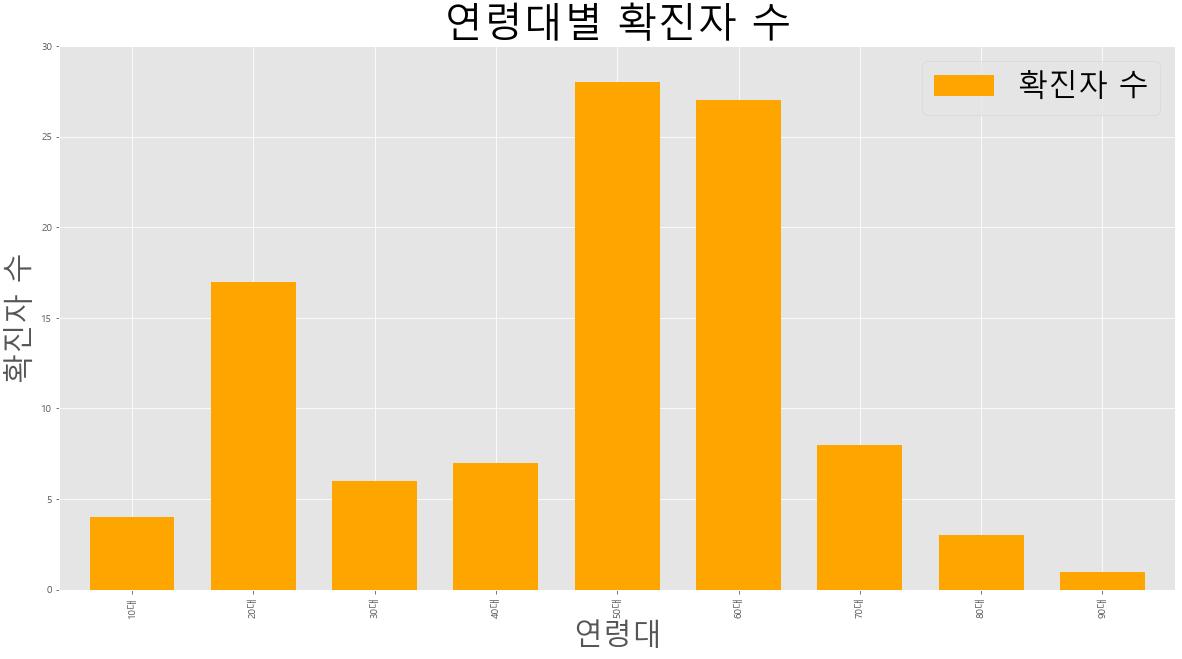

In [109]:
# 연령대별 확진자 시각화
plt.style.use( 'ggplot' ) 
dfc.plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.7,
           color = [ 'orange' ] )
plt.title( '연령대별 확진자 수', size = 40 )
plt.ylabel( '확진자 수', size = 30 )
plt.xlabel( '연령대', size = 30 )
plt.ylim( 0, 30 )
plt.legend( loc = 'best', fontsize = 30 )
plt.show()

- 50대와 60대가 뚜렷하게 많은 확진자 수를 기록하고 있고 10대, 30대, 40대는 비교적 낮은 수를 기록하고 있다.

#### 4-3. 확진자별 거주지에 대한 분석

In [110]:
# 확진자별 거주지
df['거주지'].unique()

array(['서구', '중구', '유성구', '동구', '대덕구', '세종시', '수원', '유성', '공주 (서구에 포함)',
       '대덕', '서울 (동구에 포함)'], dtype=object)

- 공주와 서울, 수원은 거주지는 각 도시이지만 대전에서 확진이 확인된 것으로만 확인

In [111]:
# 거주지별 확진자 정리
a1 = df.groupby('거주지').get_group('서구').count()[0]
a2 = df.groupby('거주지').get_group('중구').count()[0]
a3 = df.groupby('거주지').get_group('유성구').count()[0]
a4 = df.groupby('거주지').get_group('동구').count()[0]
a5 = df.groupby('거주지').get_group('대덕구').count()[0]
a6 = df.groupby('거주지').get_group('세종시').count()[0]
a7 = df.groupby('거주지').get_group('수원').count()[0]
a8 = df.groupby('거주지').get_group('유성').count()[0]
a9 = df.groupby('거주지').get_group('공주 (서구에 포함)').count()[0]
a10 = df.groupby('거주지').get_group('대덕').count()[0]
a11 = df.groupby('거주지').get_group('서울 (동구에 포함)').count()[0]
print( '서구 확진자 수 : {}명'.format( a1 + a9 ) )
print()
print( '중구 확진자 수 : {}명'.format( a2 ) )
print()
print( '유성구 확진자 수 : {}명'.format( a3 + a8 ) )
print()
print( '동구 확진자 수 : {}명'.format( a4 + a11 ) )
print()
print( '대덕구 확진자 수 : {}명'.format( a5 + a10 ) )
print()
print( '세종시 확진자 수 : {}명'.format( a6 ) )
print()
print( '수원 확진자(대전 확진자의 가족) : {}명'.format( a7 ) )
print()

서구 확진자 수 : 39명

중구 확진자 수 : 10명

유성구 확진자 수 : 40명

동구 확진자 수 : 5명

대덕구 확진자 수 : 4명

세종시 확진자 수 : 2명

수원 확진자(대전 확진자의 가족) : 1명



In [112]:
# 각 항목들을 리스트로 만듬
l3 = [a1+a9, a2, a3+a8, a4+a11, a5+a10, a6 ,a7]
l3
l4 = ['서구','중구','유성구','동구','대덕구','세종시','수원']
l4

['서구', '중구', '유성구', '동구', '대덕구', '세종시', '수원']

In [113]:
# 거주지별 확진자에 대한 데이터프레임 생성
dfr = pd.DataFrame(l3, l4, columns = {'거주지별 확진자 수'})
dfr

,거주지별 확진자 수
서구,39
중구,10
유성구,40
동구,5
대덕구,4
세종시,2
수원,1


In [114]:
# 거주지별 확진자에 대한 기본통계
dfr.describe()

,거주지별 확진자 수
count,7.000000
mean,14.428571
std,17.367183
min,1.000000
25%,3.000000
50%,5.000000
75%,24.500000
max,40.000000


- 거주지별 확진자 표준편차 :17.367183 / 가장 적은 거주지 : 수원 /  가장 많은 거주지 : 유성구

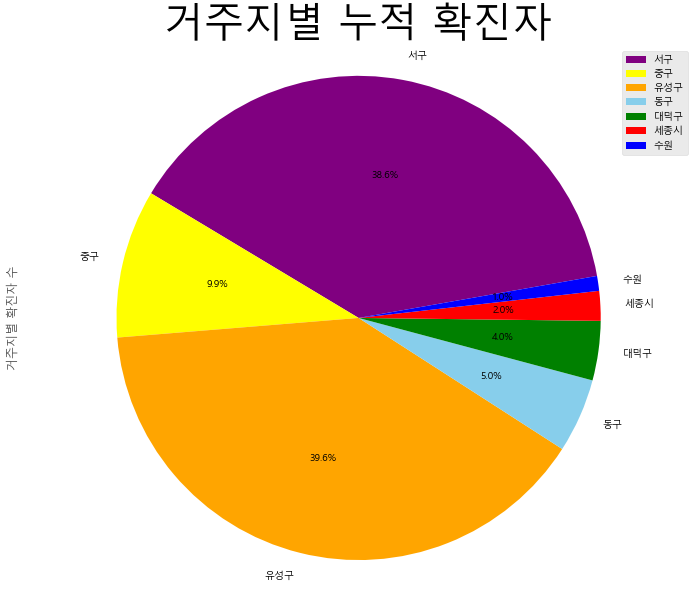

In [115]:
# 데이터프레임을 바탕으로 파이차트 생성
dfr.plot( kind = 'pie', 
                           figsize = ( 12, 10 ),
                           autopct = '%1.1f%%', 
                           startangle = 10,       
                           colors = [ 'purple', 'yellow', 'orange', 'skyblue', 'green', 'red', 'blue' ],
                           subplots = True
                         )

plt.title( '거주지별 누적 확진자', size = 40 )
plt.axis( 'equal' ) 
plt.legend( labels = l4, loc = 'upper right' )  

plt.show()

- 유성구 : 39.6% / 서구 : 38.6%로 가장 높은 지역구이고 상대적으로 대덕구, 동구 중구는 낮은 편

#### 4-4. 확진자 성별에 대한 분석

In [116]:
# 성별 확진자 수
s1 = df.groupby('성별').get_group('여').count()[0]
s2 = df.groupby('성별').get_group('남').count()[0]
print( '여자 확진자 수 : {}명'.format( s1 ) )
print()
print( '남자 확진자 수 : {}명'.format( s2 ) )
print()

여자 확진자 수 : 59명

남자 확진자 수 : 42명



In [117]:
df_gender = df['성별'].value_counts()
df_gender

여    59
남    42
Name: 성별, dtype: int64

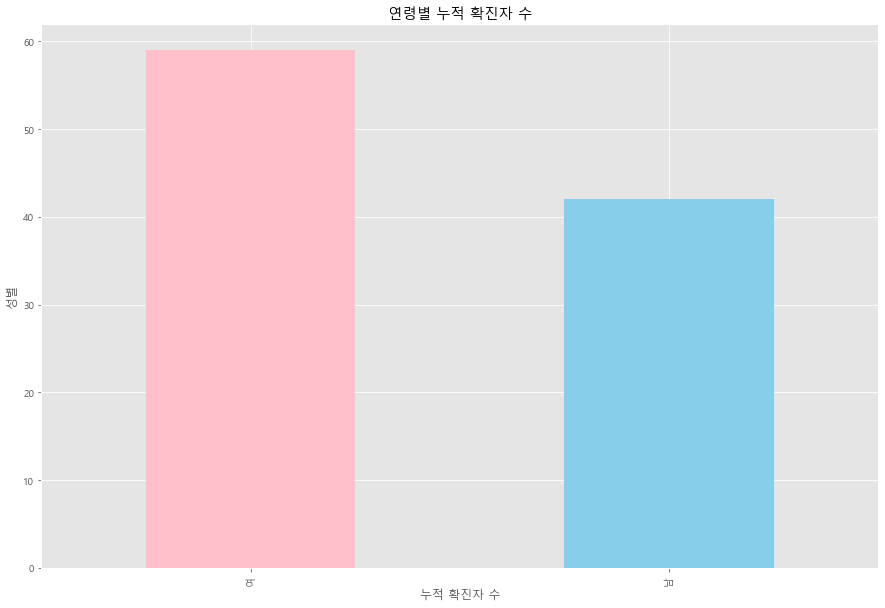

In [118]:
plt.style.use( 'ggplot' ) 

# 수평 막대 그래프 그리기
df_gender.plot( kind = 'bar', color = ['pink','skyblue'], width = 0.5, figsize = ( 15, 10 ) )

plt.title( '연령별 누적 확진자 수' )
plt.ylabel( '성별' )
plt.xlabel( '누적 확진자 수' )

plt.show()

- 수치상 여성이 남성보다 조금 더 확진자 수가 많았다.

#### 4-5. 확진자 조치사항별 분석

In [119]:
# 확진자 조치사항 별
for i in range(len(num7)):
    if num7[i] =='병원 입원예정':
        num7[i] = '병원 입원예정(6.25)'
num7

['충남대병원 입원(6.25)',
 '충남대병원 입원(6.25)',
 '충남대병원 입원(6.25)',
 '충남대병원 입원(6.25)',
 '충남대병원 입원(6.25)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.24)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.23)',
 '충남대병원 입원(6.22)',
 '충남대병원 입원(6.22)',
 '충남대병원 입원(6.22)',
 '충남대병원 입원(6.21)',
 '충남대병원 입원(6.21)',
 '충남대병원 입원(6.21)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.20)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.19)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.18)',
 '충남대병원 입원(6.17)',
 '충북대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충북대병원 입원(6.16)',
 '충남대병원 입원(6.16)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.17)',
 '충남대병원 입원(6.16)',
 '충남대병원 입원(6

- 조치사항마다 날짜가 적혀있는 것 없는 것들이 있는데 분류에 앞서 통일시켜주려고 날짜가 없는 항목에 임의의 날짜를 삽입

In [120]:
# 확진자 조치사항 내용과 날짜 분리
num71 = [num7[i].split('(')[0] for i in range(len(num7))]
num72 = [num7[i].split('(')[1] for i in range(len(num7))]

In [121]:
# 순수 조치사항만 분리
num71

['충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충북대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충북대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '충남대병원 입원',
 '완치',
 '충남대병원 입원',
 '충남대병원 입원',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '사망',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',
 '완치',


In [122]:
df['조치사항'].unique()

array(['충남대병원 입원(6.25)', '충남대병원 입원(6.24)', '충남대병원 입원(6.23)',
       '충남대병원 입원(6.22)', '충남대병원 입원(6.21)', '충남대병원 입원(6.20)',
       '충남대병원 입원(6.19)', '충남대병원 입원(6.18)', '충남대병원 입원(6.17)',
       '충북대병원 입원(6.17)', '충북대병원 입원(6.16)', '충남대병원 입원(6.16)',
       '충남대병원 입원(6.15)', '완치(6.6)', '충남대병원 입원(5.22)', '충남대병원 입원(5.16)',
       '완치(5.27)', '완치(5.22)', '완치(5.6)', '완치(4.27)', '완치(4.23)',
       '완치(5.13)', '완치(4.21)', '완치(4.15)', '완치(4.9)', '완치(4.22)',
       '완치(4.10)', '완치(5.5)', '완치(4.24)', '완치(4.6)', '완치(4.25)',
       '완치(4.5)', '완치(5.1)', '완치(4.11)', '완치(3.26)', '완치(3.28)',
       '사망(5.2)', '완치(3.29)', '완치(3.11)', '완치(3.19)', '완치(3.27)',
       '완치(3.21)', '완치(3.9)', '완치(3.2)', '완치(3.4)'], dtype=object)

- 조치사항은 총 4가지

In [128]:
# 조치사항별 정리
a2 = df.groupby('조치사항').get_group('충남대병원 입원').count()[0]
a3 = df.groupby('조치사항').get_group('충북대병원 입원').count()[0]
a4 = df.groupby('조치사항').get_group('완치').count()[0]
a5 = df.groupby('조치사항').get_group('사망').count()[0]
print( '충남대병원 입원자 수 : {}명'.format( a2 ) )
print()
print( '충북대병원 입원자 수 : {}명'.format( a3 ) )
print()
print( '완치자 수 : {}명'.format( a4 ) )
print()
print( '사망자 수 : {}명'.format( a5 ) )
print()

충남대병원 입원자 수 : 55명

충북대병원 입원자 수 : 2명

완치자 수 : 43명

사망자 수 : 1명



In [136]:
# 리스트로 만들기
j1 = [a2, a3, a4, a5]
j1
j2 = [ '충남대병원 입원자', '충북대병원 입원자', '완치자', '사망자']
j2

['충남대병원 입원자', '충북대병원 입원자', '완치자', '사망자']

In [137]:
# 데이터프레임 만들기
dfj = pd.DataFrame(j1, j2, columns = {'조치사항 별 인원'})
dfj

,조치사항 별 인원
충남대병원 입원자,55
충북대병원 입원자,2
완치자,43
사망자,1


In [138]:
# 조치사항에 대한 기본통계
dfj.describe()

,조치사항 별 인원
count,4.000000
mean,25.250000
std,27.861263
min,1.000000
25%,1.750000
50%,22.500000
75%,46.000000
max,55.000000


- 조치사항별 표준편차 : 27.861263  /  가장 적은 조치사항 항목 : 사망자  /  가장 많은 조치사항 항목 : 충남대병원 입원

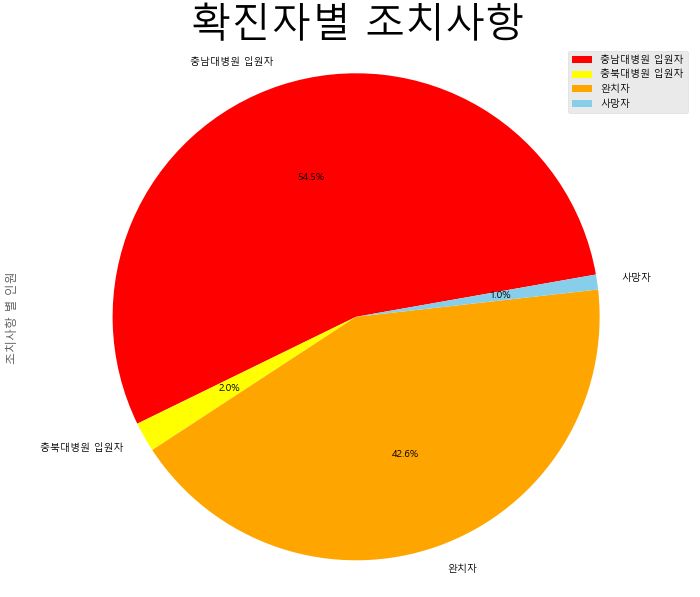

In [139]:
# 조치사항에 대한 시각화 파이차트
dfj.plot( kind = 'pie', 
                           figsize = ( 12, 10 ),
                           autopct = '%1.1f%%', 
                           startangle = 10,       
                           colors = [ 'red', 'yellow', 'orange', 'skyblue', 'green' ],
                           subplots = True
                         )

plt.title( '확진자별 조치사항', size = 40 )
plt.axis( 'equal' ) 
plt.legend( labels = j2, loc = 'upper right' )  

plt.show()

- 충남대병원 입원자와 완치에 대한 조치사항 두 항목이 합 97.1%로 대부분을 차지하고 사망자가 전체 1%로 가장 적은 항목이다.

#### 4-6. 월별 확진자 에 대한 분석

In [141]:
# 월별 확진일자
df['확진일자']

0      6.25
1      6.24
2      6.24
3      6.24
4      6.24
       ... 
96     2.26
97     2.26
98     2.23
99     2.22
100    2.21
Name: 확진일자, Length: 101, dtype: object

In [142]:
# 월만 분리
num31 = [num3[i][0] for i in range(len(num3))]
num31

['6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2']

- mm.dd에서 월만 분리하여 항목화에 용이하게 만듬

In [148]:
df2['월별확진'].unique()

array(['6', '5', '4', '3', '2'], dtype=object)

- 2월~ 6월까지

In [150]:
# 월별 확진자 정리
a1 = df2.groupby('월별확진').get_group('2').count()[0]
a2 = df2.groupby('월별확진').get_group('3').count()[0]
a3 = df2.groupby('월별확진').get_group('4').count()[0]
a4 = df2.groupby('월별확진').get_group('5').count()[0]
a5 = df2.groupby('월별확진').get_group('6').count()[0]
print( '2월 확진자 수 : {}명'.format( a1 ) )
print()
print( '3월 확진자 수 : {}명'.format( a2 ) )
print()
print( '4월 확진자 수 : {}명'.format( a3 ) )
print()
print( '5월 확진자 수 : {}명'.format( a4 ) )
print()
print( '6월 확진자 수 : {}명'.format( a5 ) )
print()

2월 확진자 수 : 13명

3월 확진자 수 : 23명

4월 확진자 수 : 4명

5월 확진자 수 : 6명

6월 확진자 수 : 55명



In [151]:
# 데이터프레임 생성
m1 = [ a1, a2, a3, a4, a5]
m1
m2 = [ '2월', '3월', '4월', '5월', '6월']
m2
dfm = pd.DataFrame(m1, m2, columns = {'월별 확진자 수'} )
dfm

,월별 확진자 수
2월,13
3월,23
4월,4
5월,6
6월,55


In [152]:
# 월별 확진자 기본통계
dfm.describe()

,월별 확진자 수
count,5.000000
mean,20.200000
std,20.825465
min,4.000000
25%,6.000000
50%,13.000000
75%,23.000000
max,55.000000


- 월별 확진자 표준편차 : 20.825465  /  확진자가 가장 적은 달 : 4월  /  확진자가 가장 많은 달 : 6월 

Text(3.1, 23, '')

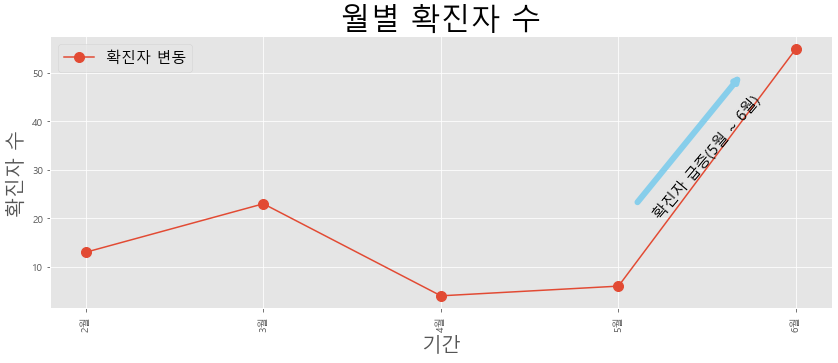

In [154]:
# 월별 확진자 수에 대한 시각화 그래프
dfc = pd.Series(m1, index = m2, name = '확진자 수')
dfc
plt.style.use( 'ggplot' )

from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

plt.figure( figsize = ( 14, 5 ) )
plt.xticks( rotation = 'vertical' )
plt.plot( dfc.index, dfc.values, marker = 'o', markersize = 10 )
plt.title( '월별 확진자 수', size = 30 )
plt.xlabel( '기간', size = 20 )
plt.ylabel( '확진자 수', size = 20 )
plt.legend( labels = [ '확진자 변동' ], loc = 'best', fontsize = 15 )
plt.ylim( )

# 주석
plt.annotate( '확진자 급증(5월 ~ 6월)',      #텍스트 입력
               xy = ( 3.5, 20 ),            #텍스트 위치 기준점
              rotation = 50,                   #텍스트 회전각도
              va = 'baseline',                 #텍스트 상하 정렬
              ha = 'center',                   #텍스트 좌우 정렬
              fontsize = 15,                   #텍스트 크기
             )
# 화살표
plt.annotate( '',
              xy = ( 3.7, 50 ),       #화살표의 머리 부분(끝점)
              xytext = ( 3.1, 23 ),    #화살표의 꼬리 부분(시작점)
              xycoords = 'data',         #좌표체계
              arrowprops = dict( arrowstyle = '->', color = 'skyblue', lw = 6 ), #화살표 서식
             )

- 4월, 5월에 잠시 주춤하였다가 6월에 확진자 수가 가파르게 증가 함 

### 5. EDA 결과
- 월별 확진자가 가장 적은 달은 4월이고 5월까지 주춤하면서 6월에 급격하게 확진자 수가 급증하였다.
- 충남대병원 입원자와 완치에 대한 조치사항 두 항목이 대부분을 차지하고 사망자 항목이 전체 1%로 1명 발생하였다 
- 성별 비교하면 여성이 남성보다 조금 더(17명) 확진자 수가 많았다.
- 유성구 : 39.6% / 서구 : 38.6%로 확진자가 가장 많은 지역구이고 상대적으로 대덕구, 동구 중구는 낮은 편
- 50대와 60대가 뚜렷하게 많은 확진자 수를 기록하고 있고 10대, 30대, 40대는 비교적 낮은 수를 기록하고 있다.